# 환경 설정
- Colab : 코드 작성, 라이브러리 연동, GPU 활용
- 구글 드라이브 : 데이터 가져오거나 저장

- 코랩에서 구글 드라이브에 있는 파일 접근
- 왼쪽 폴더 아이콘을 클릭
- 드라이브 마운트 폴더 클릭


(-0.5, 221.5, 299.5, -0.5)

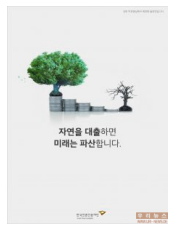

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/lecture_image/nature.png')

plt.imshow(img)
plt.axis('off')

In [ ]:
import pandas as pd

bmi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/bmi_500.csv')
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


GPU 체크하기


In [3]:
# 할당된 GPU 목록
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1306504988155251280
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16904054806258491163
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [4]:
# 현재 할당된 것이 CPU 인지 GPU 인지 확인

import tensorflow as tf

tf.config.experimental.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
# 할당된 GPU를 실행
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
  try:
    #GPU 메모리 사용을 설정
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as re:
    print(re)


In [6]:
# GPU 메모리를 전부 할당하지 않고 필요에 따라 자동으로 할당하도록 설정
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [ ]:
# 설치된 라이브러리 확인
!pip freeze

In [ ]:
# Keras 프레임워크를 이용해서 AND논리 학습하기


# Keras 프레임워크를 이용해서 AND논리 학습하기

- Sequential(): 신경망을 생성
- Dense(): 신경망에 퍼셉트론 층을 설정
  - units : 현재층의 퍼셉트론의 수 (출력의 수)
  - input_dim : 입력의 수 (입력되는 데이터의 특성의 수)
- Activation():활성화 함수를 설정
- Add(): Dense()나 Activation() 등을 신경망에 추가

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model1 = Sequential()
model1.add(Dense(units=1, input_dim = 2))
model1.add(Activation("sigmoid"))
# 생성된 신경망의 구조를 출력
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 데이터 정의

import pandas as pd
import numpy as np

X_AND = [[0,0],[0,1],[1,0],[1,1]]
y_AND = [0,0,0,1]


# 파라미터 (w,b)들의 초기값의 시드를 설정
- 일반적으로 신경망을 생성하면 파라미터(w,b)값은 랜덤으로 초기화
- 입력값의 영향을 없얘야 그 자체로 잘 만들어진 구조인지 확인가능

In [15]:
import tensorflow as tf

seed = 0

np.random.seed(seed)
print(seed)
print(np.random.seed(seed))
tf.random.set_seed(seed)
print(tf.random.set_seed)

0
None
<function set_seed at 0x7fb5f341e9e0>


In [12]:
# 작성한 신경망을 학습할 수 있도록 컴파일
# - loss : 사용할 손실함수(비용함수)
#   - 회귀 : mse. mean_squared_error
#   - 이진분류 : binary_crossentropy
#   - 다진분류 : categorical_crossentropy
# - optimizer : 최적화 함수(경사하강법의 종류)
#   - adam
# - metrics : 평가도구(정확도 또는 오차)
#   - 회귀 : 표기하지 않음
#   - 분류 : accuracy

model1.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# 학습
# batch_size : 한번 반복할 때 몇 개 데이터를 사용할 것인지 설정
# epochs : 몇 번 반복할 것인지 설정(w,b를 몇 번 업데이트 할 것인지 설정)
h1 = model1.fit(X_AND, y_AND, batch_size=4, epochs = 1000)


In [41]:
X_new = [[1,0],[0,1],[1,1], [0,1]]

pred = model1.predict(X_new)
pred

array([[0.0810544 ],
       [0.07243615],
       [0.9178596 ],
       [0.07243615]], dtype=float32)